**Repaso Clasificación para Analisis de datos**

Ejercicio de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

Se quiere profundizar en el tema de clasificación. Nos centraremos en un set de datos que contiene información médica y las siguientes especificaciones:




*   Se tienen 5 tipos de medicamentos, el de tipo A, B, C, X y el de tipo Y.
*   Cada tipo de medicamento reacciona mejor dependiendo el tipo de paciente.
* Para definir que tipo de medicamento requiere cada paciente se cuenta con su edad, su género, su nivel de presión sanguínea, su colesterol y su nivel de sodio a potasio en la sangre.
* Los datos contienen 200 ejemplos de pacientes con características diferentes y el tipo de medicamento que deberían de consumir


***El propósito general de este ejemplo es implementar un modelo de ML que se entrene con estos datos y al ingresar un paciente nuevo, el modelo le pueda asignar un tipo de medicamento, basándose en sus características.***

**Descargar Datos**


In [2]:
# Importa las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
url='https://raw.githubusercontent.com/jofsanchezci/Ejemplo_Clasificacion_A/main/data_set_1.csv'
df=pd.read_csv(url)

In [5]:
#Mostrar el data set
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [4]:
# Obten información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


**Análisis de cada Variable**

Max Edad: 74
Min Edad: 15


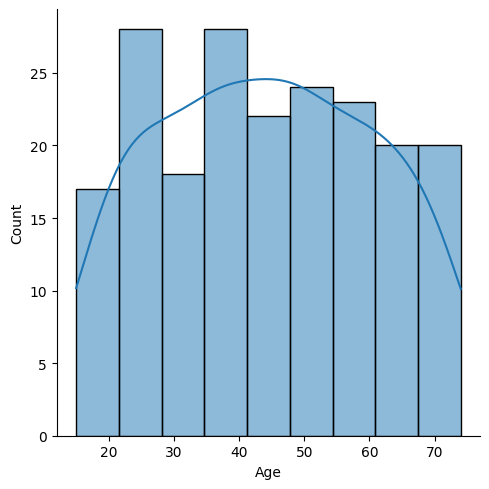

In [8]:
import seaborn as sns
# Analiza la edad, visualiza sus máximos y mínimos
print("Max Edad:", df.Age.max())
print("Min Edad:", df.Age.min())
#Gráfica la variable
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen
#plt.figure(figsize = (9,5))
#Crea un displot para de la edad (por ser una variable numérica)
sns.displot(df.Age,kde=True)
plt.show()


In [9]:
# Género: cuenta cuántos hombres y mujeres hay
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

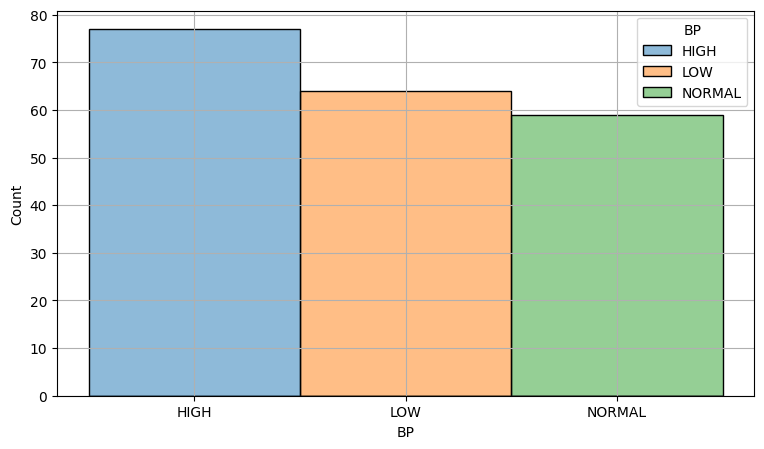

In [11]:
# Crear una gráfica de barras para Presión Sanguinea
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="BP",hue="BP")
plt.grid()
plt.show()

In [22]:
#Crear la grafica con matplot-lib
H,L,N=df.BP.value_counts()
presion=[H,L,N]
etiqueta=['Alto','Bajo', 'Normal']


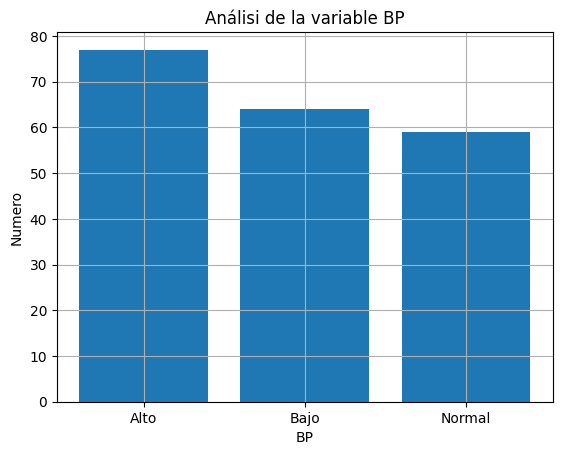

In [24]:
#El garfico con Matplot.lib
plt.bar(etiqueta,presion)
plt.xlabel('BP')
plt.ylabel('Numero')
plt.title('Análisi de la variable BP')
plt.grid()
plt.show()

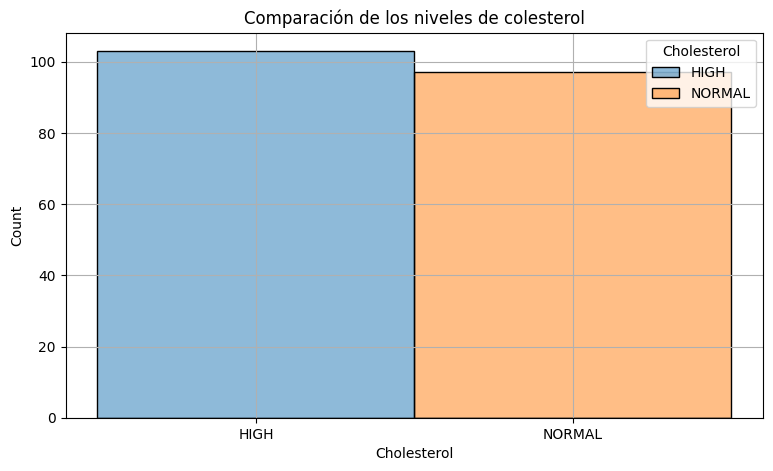

In [26]:
# Crear una gráfica de barras para Colesterol
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="Cholesterol",hue="Cholesterol")
plt.title('Comparación de los niveles de colesterol')
plt.grid()
plt.show()

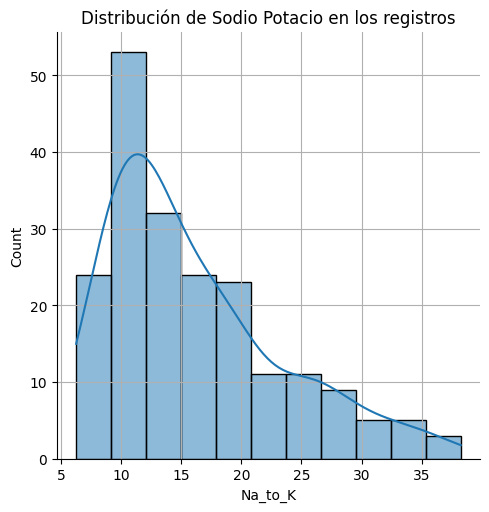

In [28]:
# Crear un displot para Sodio Potasio
#plt.figure(figsize = (9,5))
sns.displot(df.Na_to_K,kde=True)
plt.title('Distribución de Sodio Potacio en los registros')
plt.grid()
plt.show()

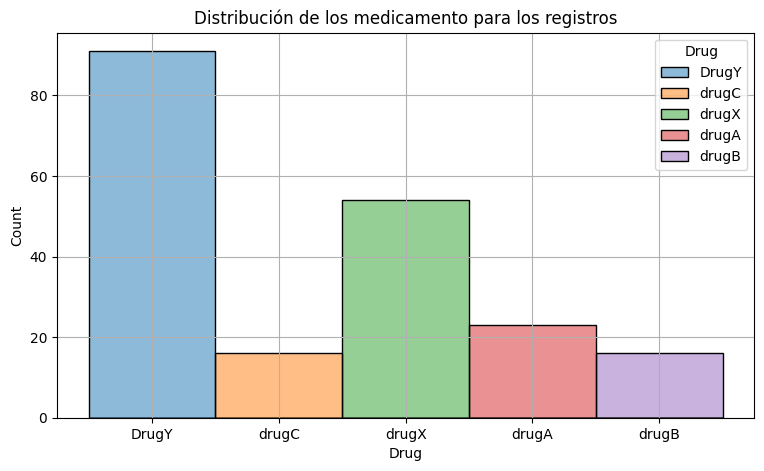

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [29]:
# Crea una gráfica de barras para los Medicamentos
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="Drug",hue="Drug")
plt.title('Distribución de los medicamento para los registros')
plt.grid()
plt.show()
#Cuenta los medicamentos
df.Drug.value_counts()


***

**Análisis de Relación entre Variables**


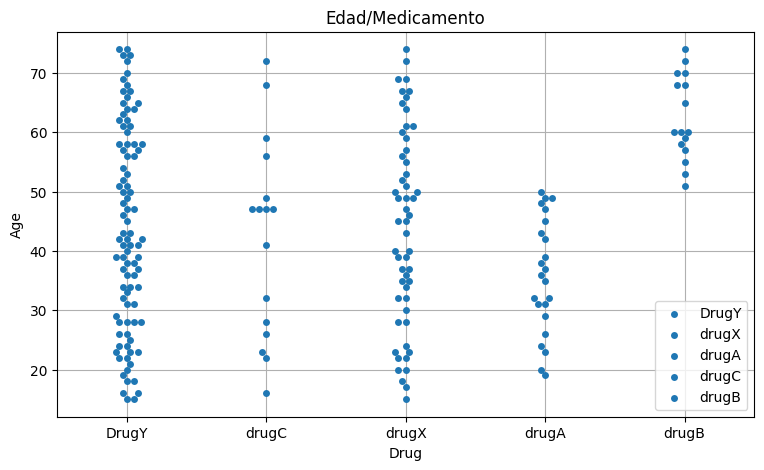

In [30]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos dados
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Edad/Medicamento")
plt.grid()
plt.show()

In [33]:
#Utilizando matplot lib se pueda anlizar la distribución de losmedicamentos vs
#las edades
df.head(1)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY


In [35]:
#datosV.groupby(datosV['departamento']).count()[['cantidad']]
df.groupby(df['Drug']).count()[['Age']]

,Age
Drug,
DrugY,91
drugA,23
drugB,16
drugC,16
drugX,54


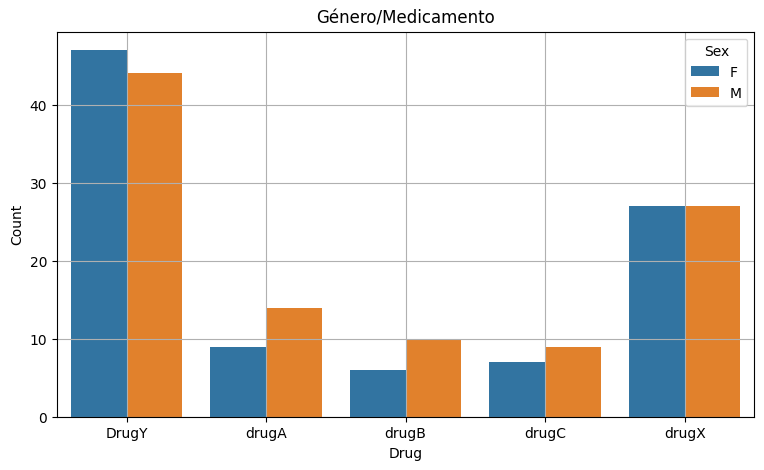

In [36]:
# Grafica la relación entre el el Género y los Medicamentos que se les da
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Género/Medicamento")
plt.grid()
plt.show()

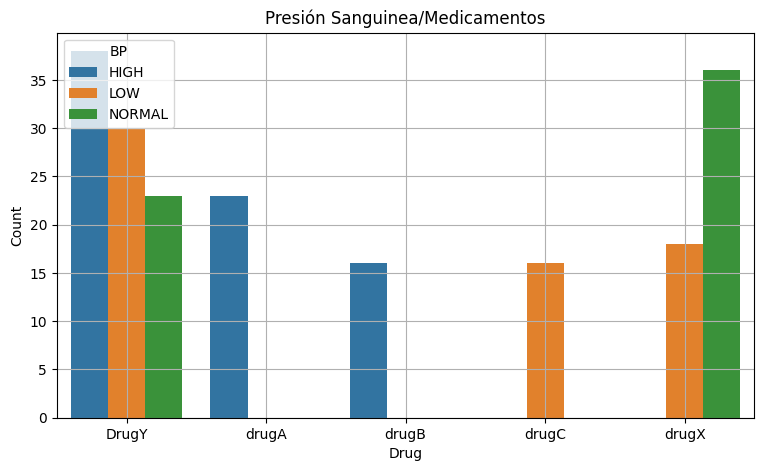

In [37]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.grid()
plt.title("Presión Sanguinea/Medicamentos")
plt.show()

Text(0.5, 1.0, 'Colesterol/Medicamentos')

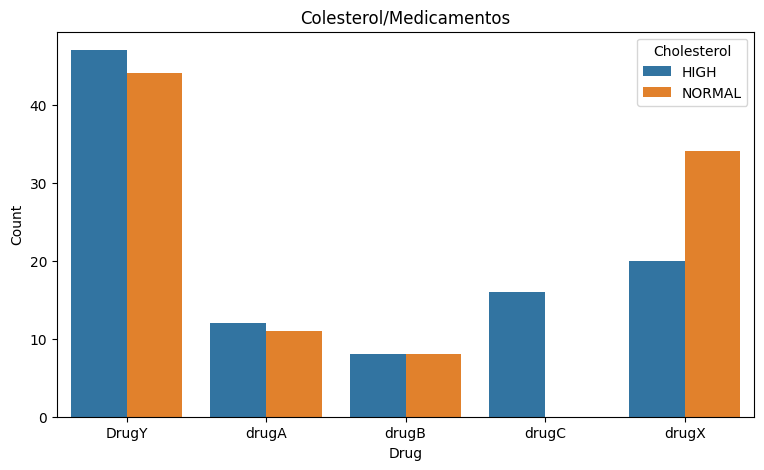

In [ ]:
# Grafica (con una gráfica de barras)la relación entre el nivel de colesterol y los medicamentos
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Colesterol/Medicamentos")

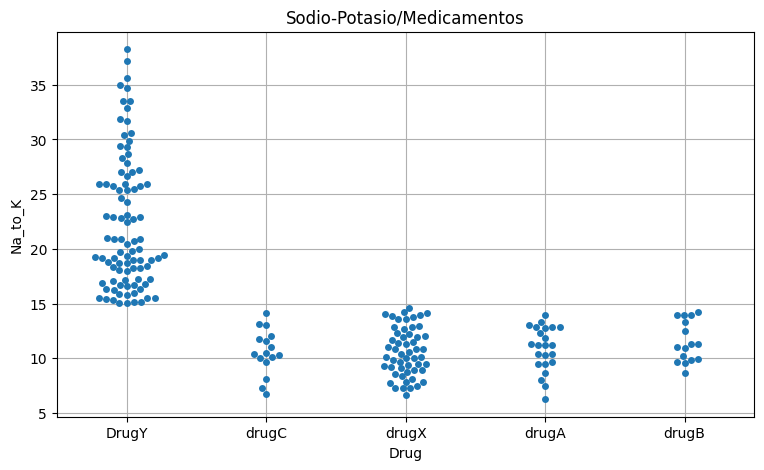

In [41]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos que se les da
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.title("Sodio-Potasio/Medicamentos")
plt.grid()
plt.show()



***

**Limpieza y Separación de Datos**


In [45]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
from sklearn.preprocessing import LabelEncoder

def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

variables = ["Sex","BP","Cholesterol","Na_to_K","Drug"]

for l in variables:
    label_encoder(l)

df.tail(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
190,58,1,0,0,140,0
191,23,1,0,0,12,1
192,72,1,1,0,121,0
193,72,1,1,0,2,3
194,46,0,0,0,193,0
195,56,0,1,0,69,3
196,16,1,1,0,75,3
197,52,1,2,0,36,4
198,23,1,2,1,102,4
199,40,0,1,1,66,4


In [47]:
#sex: 0=F 1=M
#BP: 0=ALTO 1:BAJO 2: NORMAL
#Cholesteriol: 0=Alto 1=BAJO
#Na_to_K: hace una conversion para tener enteros
#Drug: 0=drogaY, 3=drugC, 4=drugX, 1=drugA* 2=durgB*

In [48]:
# Crear set de entrenamiento y set de prueba
x = df.drop(["Drug"],axis=1)
y = df.Drug
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

**Modelo de Clasificación Binario**


In [49]:
## Crear modelo para medicamento
y_train_y = (y_train == 0)
y_test_y = (y_test == 0)

In [52]:
print(y_train_y)
print('-----------------')
print(y_test_y)

79     False
197    False
38     False
24      True
122     True
       ...  
106    False
14     False
92      True
179     True
102    False
Name: Drug, Length: 160, dtype: bool
-----------------
95     False
15      True
30     False
158    False
128     True
115     True
69      True
170    False
174    False
45     False
66     False
182    False
165     True
78     False
186    False
177     True
56     False
152    False
82     False
68      True
124    False
16     False
148    False
93      True
65      True
60      True
84     False
67     False
125     True
132    False
9       True
18     False
55     False
75      True
150    False
104     True
135    False
137    False
164     True
76     False
Name: Drug, dtype: bool


Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [50]:
## Modelo SGD= Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
sgd.fit(x_train,y_train_y)
#sgd.predict([[47,1,1,0,8,0]])

SGDClassifier(random_state=42)

In [55]:
sgd.predict([[47,1,1,0,8]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [53]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado
sgd.predict([x_train.loc[0]]), y_train_y.loc[42]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


(array([ True]), True)

para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

**Medidas de desempeño**


**Exactitud**

In [56]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,x_train,y_train_y,cv=3,scoring="accuracy")

array([0.7962963 , 0.73584906, 0.71698113])


**cv:** número de dobleses

**scoring:** accuracy (será nuestra medida de desempeño)  

In [57]:

from sklearn.base import BaseEstimator
class NuncaC(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

nunca_c = NuncaC()
cross_val_score(nunca_c,x_train,y_train_y,cv=3,scoring="accuracy")


array([0.57407407, 0.52830189, 0.47169811])

***

**Matriz de Confusión**

Una mejor manera de evaluar el performance de un modelo clasificador es con la llamada matriz de confusión. La idea es contar el número de veces que un ejemplo A es clasificado como un ejemplo B. Para crear una matriz de confusión primero se debe tener un conjunto de predicciones para después compararlas con el objetivo en específico.

Para entender cómo funciona pongamos atención en la siguiente imagen:




[Imagen](https://drive.google.com/uc?id=1itByrmXN8ikOpNu42fqtuBJfnSmhkkjt)

Como podemos ver del lado izquierdo de la matriz están los negativos por lo que, en nuestra matriz, 140 de los casos que no son medicamento Y fueron clasificados como otro medicamento mientras que 10 casos que no eran medicamento Y fueron clasificados como este

Del lado derecho tenemos los positivos, por lo que en 9 de los casos que tenían que ser medicamento Y nuestro modelo lo marcó como otro medicamento, y solo en una ocasión lo clasificó como medicamento Y.
Esto nos habla de que hasta el momento el modelo se está desempeñando mal a la hora de tener que clasificar cuando si es el medicamento Y.
Una matriz que representa 100% de las clasificaciones correctas se vería de la siguiente manera:

[Imagen](https://drive.google.com/uc?id=1_WqD_iJPHpXjRmgTW5u2Y-RjnycJfqcD)

In [58]:
# Matriz de confusión
#Importar cross_val_predict
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd,x_train,y_train_y,cv=3)
#Importar confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_y,y_train_pred)

array([[44, 40],
       [ 0, 76]])

**Verdaderos Negativos**: esquina superior izquierda

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha

***

**Precision y Recall**

In [59]:
#Importar precision_score y recall_score
from sklearn.metrics import precision_score, recall_score
p = precision_score(y_train_y,y_train_pred)
r = recall_score(y_train_y,y_train_pred)
p,r

(0.6551724137931034, 1.0)

In [60]:
#Cambiar de clasificador
#Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train,y_train_y)
#Hacer la matriz de confusión otra vez
y_train_pred = cross_val_predict(rfc,x_train,y_train_y,cv=3)
confusion_matrix(y_train_y,y_train_pred)

array([[84,  0],
       [ 2, 74]])

In [61]:
#Calcular la precisión y recall con el nuevo clasificador
p = precision_score(y_train_y,y_train_pred)
r = recall_score(y_train_y,y_train_pred)
p,r

(1.0, 0.9736842105263158)

In [62]:
#Calcular F1
from sklearn.metrics import f1_score
f1_score(y_train_y,y_train_pred)

0.9866666666666666

***

**Umbral Precision y Recall**

In [64]:
#Puntación de un paciente aleatorio
y_score = sgd.decision_function([[47,1,1,0,8]])
y_score

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([-22523.33667944])

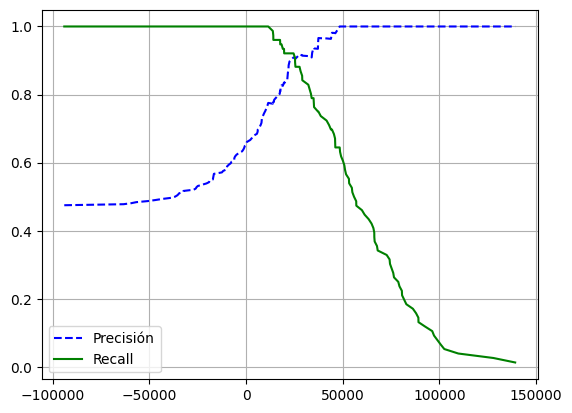

In [66]:
#Graficar la precisión y recall
y_scores = cross_val_predict(sgd,x_train,y_train_y,cv=3,method="decision_function")
#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará
#Graficar la precisión y recall, ahora si
from sklearn.metrics import precision_recall_curve
precisions, recalls, umbrales = precision_recall_curve(y_train_y,y_scores)
plt.plot(umbrales, precisions[:-1],"b--",label="Precisión")
plt.plot(umbrales, recalls[:-1],"g-",label="Recall")
plt.grid()
plt.legend()
plt.show()

El umbral permite conocer qué medida priorizar acorde a tus objetivos.

In [67]:
#Supon que ya lo pensaste y querías un umbral  90
umbral_90 = umbrales[np.argmax(precisions >= 0.90)]
umbral_90

24575.640603301497

In [68]:
#Arroja la precisión y recall para un umbral de 90
y_train_90 = (y_scores >= umbral_90)
p = precision_score(y_train_y,y_train_90)
r = recall_score(y_train_y,y_train_90)
p,r

(0.9090909090909091, 0.9210526315789473)

***

**Curva ROC**


Grafica Recall contra el porcentaje de Falsos Positivos

In [69]:
#Importar roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, umbrales = roc_curve(y_train_y,y_scores)

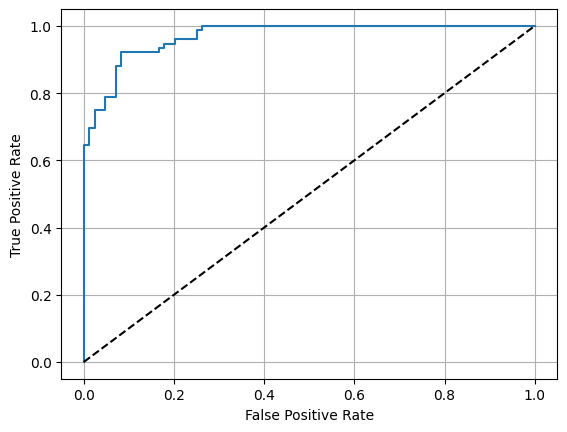

In [70]:
#Graficar la curva ROC
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1],[0, 1], 'k--')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#Poner una cuadrícula
plt.grid()
plt.show()

Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [71]:
#Calcular el puntaje de la curva
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_y,y_scores)

0.9691416040100251

In [72]:
#Compararlo con el modelo de random forest
y_forest = cross_val_predict(rfc,x_train,y_train_y,cv=3,method="predict_proba")
y_scores_forest = y_forest[:,1]

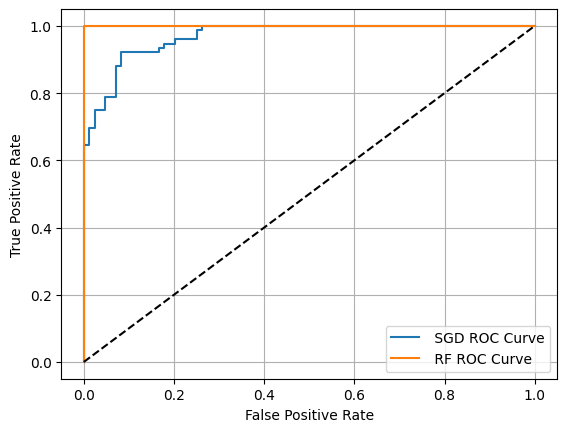

In [73]:
#Graficar la curva ROC y la predicción de random forest
fpr_forest, tpr_forest, umbral_forest = roc_curve(y_train_y,y_scores_forest)
plt.plot(fpr, tpr, label=" SGD ROC Curve")
plt.plot(fpr_forest, tpr_forest, label=" RF ROC Curve")
plt.plot([0, 1],[0, 1], 'k--')
plt.legend()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid()
plt.show()

In [74]:
#Calcular el puntaje (área bajo la curva) de random forest
roc_auc_score(y_train_y,y_scores_forest)

1.0

**Clasificadores Multiclase**


In [76]:
# Importar SVC=Support Vector Classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)

#Predecir a un humano aleatorio para ver que todo este funcionando bien
svm.predict([[25,0,1,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([4])

In [79]:
#Utilizar decision_function para observar los puntajes de cada medicina
svm.decision_function([[25,0,1,167,0]])
#Decidirá por el qué tenga mayor puntaje

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 4.06158839,  1.98951746,  0.85591692, -0.23611841,  3.24991644]])

In [81]:
#Ahora, utiliza el clasificador multiclase
from sklearn.multiclass import OneVsRestClassifier
svm = OneVsRestClassifier(SVC())
svm.fit(x_train,y_train)
#Predecir a un humano ahora con este clasificador
svm.predict([[25,0,1,167,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [82]:
#Utilizar decision_function para observar los puntajes de cada medicina
svm.decision_function([[25,0,1,167,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[-0.0713522 , -1.0122918 , -1.03225663, -1.00046919, -0.11700037]])

In [83]:
#campararlo con los datos obtenidos de sgd.fit
sgd.fit(x_train,y_train)

SGDClassifier(random_state=42)

**Analizar Errores**

In [84]:
#Hacer un clasificador de random forest
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [85]:
#Utilizar la matriz de confusión
y_train_pred = cross_val_predict(rfc, x_train, y_train, cv=3)
conf_mz = confusion_matrix(y_train,y_train_pred)
conf_mz

array([[75,  0,  0,  1,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  1, 12,  0,  0],
       [ 0,  0,  0,  7,  4],
       [ 0,  0,  0,  0, 43]])

In [86]:
#utilizar ahora SGD
y_train_pred = cross_val_predict(sgd, x_train, y_train, cv=3)
conf_mz = confusion_matrix(y_train,y_train_pred)
conf_mz

array([[61, 15,  0,  0,  0],
       [ 5, 10,  0,  0,  2],
       [ 3,  5,  1,  0,  4],
       [ 4,  5,  0,  0,  2],
       [16, 11,  1,  0, 15]])